## 17.1 OOP vezbanje

Neka je dato igraliste 5x5 

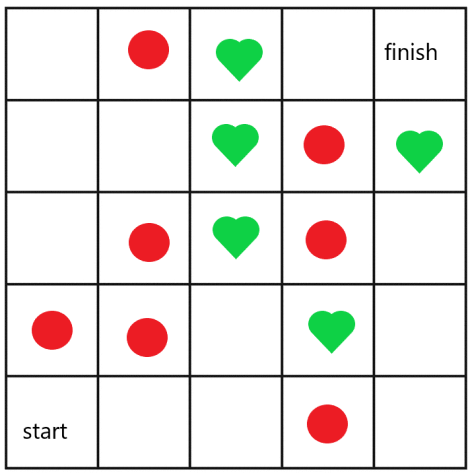

Crvene tackice predstavljaju opasna polja na kojima se nalaze mine, a zelena srca predstavljaju polja koja donose poene kada se na njih stane. **start** i **finish** su polja sa kojih igrac krece, tj. na kom igrac zavrsava igru.

Implementirati klasu **Igraliste** koja ce da simulira igraliste sa slike gore i koja ce igracu davati po 10 poena ukoliko stane na srce ili oduzimati 10 poena ukoliko stane na minu. Pokretanje igre implementirati u ovoj klasi.

Implementirati klasu **Igrac** koja ce da simulira igraca koji se krece po igralistu i time skuplja poene, sa ciljem da dodje do polja **finish** sa najvise moguce poena. U ovoj klasi dodatno implementirati i kretanje igraca.

Samu logiku igrice i kretanja osmisliti ad hoc.

---

In [6]:
class Igraliste:
    def __init__(self):
        self.__arena = [[0,     -10,    10,     0,      0],
                        [0,     0,      10,     -10,    10],
                        [0,     -10,    10,     -10,    0],
                        [-10,   -10,    0,      10,     0],
                        [0,     0,      0,      -10,    0]]
        self.__start = {'x': 4, 'y': 0}
        self.__finish = {'x': 0, 'y': 4}
        self.donjaGranica = 4 # po x
        self.gornjaGranica = 0 # po x
        self.levaGranica = 0 # po y
        self.desnaGranica = 4 # po y

    def getField(self, koor):
        return self.__arena[koor['x']][koor['y']]

    def proveriFinish(self, igrac):
        if igrac.getPozicija() == self.__finish:
            return True
        else:
            return False

class Igrac:
    def __init__(self):
        self.__pozicija = {'x': 4, 'y': 0}
        self.__prethodnaPozicija = {'x': 4, 'y': 0}
        self.__hp = 20

    def getPozicija(self):
        return self.__pozicija

    def getHP(self):
        return self.__hp

    def eat(self, food):    # food = igraliste.getField(igrac.pozicija())
        if food < 0:
            print("Bomba!")
        elif food > 0:
            print("Hrana!")
            
        self.__hp += food

    def show(self):
        print(f"({self.__pozicija['x']}, {self.__pozicija['y']}) HP = {self.__hp}")

    def __goLeft(self):
        self.__pozicija['y'] -= 1

    def __goRight(self):
        self.__pozicija['y'] += 1

    def __goUp(self):
        self.__pozicija['x'] -= 1
    
    def __goDown(self):
        self.__pozicija['x'] += 1

    def move(self, igraliste):
        while True:
            smer = input("Unesi smer kretanja: ")
                                    
            if smer == 'levo':
                if self.__pozicija['y'] > igraliste.levaGranica:
                    self.__goLeft()

                break
            elif smer == 'desno':
                if self.__pozicija['y'] < igraliste.desnaGranica:
                    self.__goRight()

                break
            elif smer == 'gore':
                if self.__pozicija['x'] > igraliste.gornjaGranica:
                    self.__goUp()
                    
                break
            elif smer == 'dole':
                if self.__pozicija['x'] < igraliste.donjaGranica:
                    self.__goDown()
                    
                break
            else:
                print("Neispravan unos smera! Probaj opet")
    
    def moveBack(self):
        self.__pozicija['x'] = self.__prethodnaPozicija['x']
        self.__pozicija['y'] = self.__prethodnaPozicija['y']

def pokreniIgru(igraliste, igrac):
    while True:
        # prikazi gde se igrac nalazi
        igrac.show()
        # Korisnik pomeri igraca u zeljenom smeru
        igrac.move(igraliste)

        # jede sa polja na kom se nasao
        igrac.eat(igraliste.getField(igrac.getPozicija()))

        # da li je kraj igrice
        # jesu li helti spali ispod 0?
        if igrac.getHP() <= 0:
            print(f"GAME OVER! Vasi HP su {igrac.getHP()}")
            break

        # je li igrac dosao do finisha
        if igraliste.proveriFinish(igrac):
            print(f"YOU WIN! Vasi HP su {igrac.getHP()}")
            break


# main
igrac = Igrac()
igraliste = Igraliste()
pokreniIgru(igraliste, igrac)

(4, 0) HP = 20
Unesi smer kretanja: desno
(4, 1) HP = 20
Unesi smer kretanja: desno
(4, 2) HP = 20
Unesi smer kretanja: gore
(3, 2) HP = 20
Unesi smer kretanja: gore
Hrana!
(2, 2) HP = 30
Unesi smer kretanja: gore
Hrana!
(1, 2) HP = 40
Unesi smer kretanja: gore
Hrana!
(0, 2) HP = 50
Unesi smer kretanja: desno
(0, 3) HP = 50
Unesi smer kretanja: desno
YOU WIN! Vasi HP su 50


In [ ]:
class Igraliste:
    def __init__(self):
        self.__arena = [[0, -10, 10, 0, 0],
                        [0, 0, 10, -10, 10],
                        [0, -10, 10, -10, 0],
                        [-10, -10, 0, 10, 0],
                        [0, 0, 0, -10, 0] ]
        self.__start = {"x": 4, "y": 0}
        self.__finish = {"x": 0, "y": 4}
        self.__gornjaGranica = 0
        self.__donjaGranica = 4
        self.__levaGranica = 0
        self.__desnaGranica = 4

    def getField(self, x, y):
        return self.__arena[x][y]

    def proveri(self, igrac):
        if igrac.getPozicija()["x"] > self.__donjaGranica or igrac.getPozicija()["x"] < self.__gornjaGranica:
            print('Izasli ste van opsega igralista! Probajte ponovo!')
            return False

        if igrac.getPozicija()["y"] > self.__desnaGranica or igrac.getPozicija()["y"] < self.__levaGranica:
            print('Izasli ste van opsega igralista! Probajte ponovo!')
            return False

        return True

    def proveriFinish(self, igrac):
        if igrac.getPozicija() == self.__finish:
            return True
        else:
            return False


class Igrac:
    def __init__(self):
        self.__pozicija = {"x": 4, "y": 0}
        self.__hp = 20  # pocetna vrednost za health poene
        self.__prethodna_pozicija = {"x": 4, "y": 0}

    def gore(self):
        self.__pozicija["x"] -= 1

    def dole(self):
        self.__pozicija["x"] += 1

    def levo(self):
        self.__pozicija["y"] -= 1

    def desno(self):
        self.__pozicija["y"] += 1

    def eat(self, poen):
        self.__hp += poen

    def getHP(self):
        return self.__hp

    def getPozicija(self):
        return self.__pozicija

    def move(self):
        smer = input("Unesi smer kretanja: ")

        # zapamtimo prethodnu poziciju pre nego sto se pomerimo
        self.__prethodna_pozicija["x"] = self.__pozicija["x"]
        self.__prethodna_pozicija["y"] = self.__pozicija["y"]

        if smer == "gore":
            self.gore()
        elif smer == "dole":
            self.dole()
        elif smer == "levo":
            self.levo()
        elif smer == "desno":
            self.desno()
        else:
            print("Neispravan smer kretanja! ")

    def moveBack(self):
        self.__pozicija["x"] = self.__prethodna_pozicija["x"]
        self.__pozicija["y"] = self.__prethodna_pozicija["y"]

    def prikaziSe(self):
        print(f"{self.__pozicija}, HP: {self.__hp}")

    def __len__(self):
        return 2

def pokreniIgru(igraliste, igrac):
    # dok god igrac ima pozitivne helte i nije dosao do finisha, nek se vrti
    while True:
        # igramo
        igrac.prikaziSe()
        igrac.move()

        if igraliste.proveri(igrac):  # Da li je u okvirima igralista
            # ako jeste, pojede ono sto se nadje na polju
            igrac.eat(igraliste.getField(igrac.getPozicija()["x"], igrac.getPozicija()["y"]))
        else:
            # ako je izasao iz opsega, neka se vrati nazad
            igrac.moveBack()
            continue

        # proveravamo da li je kraj igre: ili ako imamo <= 0 HP ili smo dosli do kraja
        if igrac.getHP() <= 0:
            print("GAME OVER!")
            break

        if igraliste.proveriFinish(igrac):
            print(f"POBEDILI STE! IMALI STE {igrac.getHP()} POENA!")
            break


igraliste = Igraliste()
igrac = Igrac()

pokreniIgru(igraliste, igrac)

## 17.2 Exceptions

- Uopsteno govoreci, postoje dva tipa gresaka u nekom jeziku: sintaksne greske i izuzeci

- **Sintaksne greske** su greske koje se javljaju pri prevodjenju Python koda i posledica su nepostovanja pravila Python sintakse

- Primer:



In [ ]:
print("Ovo je greska"

SyntaxError: ignored

- Crvenim slovima je ispisano **SyntaxError** i kvacicom ^ je indikovano gde je greska

- Ovakve greske se mogu popraviti relativno jednostavno

- Medjutim, postoje greske koje nisu posledica nepostovanja pravila jezika, vec se javljaju (nepredvidjeno) tokom izvrsavanja koda

- Takve greske, koje se javljaju u runtime-u nazivaju se izuzecima (**exceptions**)

- Primer:

In [ ]:
print(10/0)

ZeroDivisionError: ignored

In [9]:
print(int("Nemampojmasta"))

ValueError: ignored

In [ ]:
print(hitler*10)

NameError: ignored

- Sve ove greske - **NameError**, **ValueError**, **ZeroDivisionError** - su posebni tipovi izuzetaka

- Ovo su ugradjeni izuzeci, i pored tipa izuzetka crvenom bojom, prikazan je i dodatan info o uzroku izuzetka, kao i kontekst u kom se izuzetak javio

- Izuzeci su dogovoreni nacin indikovanja gresaka u modernom programiranju i treba ih koristiti sto je cesce moguce

### 17.2.1 Hvatanje izuzetaka

- Primer

In [ ]:
while True:
    try:
        x = int(input("Unesi prirodan broj: "))
    except Exception as e:
        print("To nije prirodan broj!")
        print(e)
        # sta dalje? ili probaj opet ili gasi
        continue
        #break

- U trenutku kada je umesto ocekivanog int-a unet string, javlja se **ValueError**

- Uokvirivanjem koda koji potencijalno moze da baci izuzetak **try-except** blokom osiguravamo se da program ne pukne, tj. da odreagujemo adekvatno na gresku

- U ovom slucaju, korisnik je omasio unos koji smo ocekivali. Kao programeri, mozemo da izaberemo da li da nastavimo sa petljom i da ga pustimo da unosi dalje, ili da izadjemo iz unosa

- **try** deo bloka je tu kako bi se obezbedio "pokusaj" izvrsavanja nekog dela koda

- **except** deo hvata greske ako su se desile u **try** delu

- Posto smo videli da postoje razni tipovi gresaka, mozemo odreagovati shodno tipu, a ne generalno, kao sto je gore uradjeno

- Primer

In [ ]:
try:
    print(oduzimam - 1)
except (RuntimeError, TypeError, NameError) as e:
    print(e, type(e))
except Exception as e:
    print(e)


name 'oduzimam' is not defined <class 'NameError'>


- Postavlja se pitanje koliko treba sitnicariti oko hvatanja izuzetaka s obzirom da se manje-vise mogu javiti bilo gde

- Zgodna stvar je da ce izuzetak da propagira unazad kroz ugnjezdene pozive sve do najblizeg **try-except** bloka, tako da pri razvoju logike programa na mestima koja smatramo kriticnim, moramo imati hvatanje izuzetaka

In [ ]:
def proveriDataLinkNivoUSBkomunikacije():
    if 1 < 2:   # neka zica nije zalemljena, javi gresku
        raise Exception("Kamera nije konektovana! Proveri USB konekciju!")

def poveziSeUSBom():
    proveriDataLinkNivoUSBkomunikacije()
    # blabla

def povezivanjeSaKamerom():
    poveziSeUSBom()

def dohvatanjeFrejmaSaKamere():
    try:
        # moramo se osigurati da ovaj deo radi, inace nema smisla da obradjujemo frejm dalje
        povezivanjeSaKamerom()
    except Exception as e:
        print(e)
        return None

    # dalja obrada frejma ako je sve proslo kako treba


frejm = dohvatanjeFrejmaSaKamere()

Kamera nije konektovana! Proveri USB konekciju!


- Greska je propagirala iz neke low-level funkcije, i mi smo je uhvatili i adekvatno reagovali na nju na nekom high-level nivou, u delu koda koji je kritican

- Isto ovo vazi i za bilo koji tip izuzetka koji se moze javiti, sto se cesto desava pri otvaranju resursa (kamere, baze, fajla) i kroz praksu se uci kako paziti na te situacije

## 17.2.2 Bacanje izuzetaka

- Kao sto se mogu uhvatiti, izuzeci se mogu kreirati i baciti iz proizvoljnog dela koda

- Izuzetak zelimo da bacimo upravo kada treba da sprecimo dalje izvrsavanje koda u slucaju neke kriticne greske (recimo, korisnik uneo string umesto int)

- Izuzetak se baca koriscenjem **raise** naredbe

In [10]:
raise NameError("Ovo je built-in izuzetak")     # raise TipIzuzetka(poruka)

NameError: ignored

## 17.2.3 Kreiranje korisnickih izuzetaka

- Pored ugradjenih, mogu se kreirati i novi tipovi izuzetaka, koji su od znacaja za nas program

In [12]:
class IzasaoVanGranicaIgralista(Exception): # nasledjuje iz klase Exception
    """
        message -- objasnjenje greske
    """
    def __init__(self, message):
        super().__init__(message)

In [13]:
raise IzasaoVanGranicaIgralista("Otisao si predaleko!")

IzasaoVanGranicaIgralista: ignored

- Postoji jos stvari koje treba znati o izuzecima, ali ovo osnovno je sasvim dovoljno za dalji rad

## 17.3 Debugging

- Naci neki zadatak i objasniti na primeru, posto Colab nema debugging mogucnosti (recimo za domaci sto je bilo)